In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/My Drive/2017_jun_final - 2017_jun_final.csv'
df = pd.read_csv(file_path)

In [7]:
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [8]:
df.head

<bound method NDFrame.head of          N                    Посада Мова програмування Спеціалізація  \
0        1        Junior QA engineer                NaN     Manual QA   
1        2        Junior QA engineer                NaN     Manual QA   
2        3         Software Engineer            C#/.NET           NaN   
3        4         Software Engineer         JavaScript           NaN   
4        5  Senior Software Engineer         JavaScript           NaN   
...    ...                       ...                ...           ...   
8699  8700               QA engineer                NaN     Manual QA   
8700  8701                 Marketing                NaN           NaN   
8701  8702  Junior Software Engineer         Ruby/Rails           NaN   
8702  8703                 Team lead                NaN           NaN   
8703  8704  Senior Software Engineer               Java           NaN   

     Загальний досвід роботи Досвід роботи на поточному місці  \
0                        0.5                              0.5   
1            менше 3 місяців                  менше 3 місяців   
2                          4                                1   
3                          5                                4   
4          10 і більше років                              0.5   
...                      ...                              ...   
8699                       1                  менше 3 місяців   
8700                     0.5                              0.5   
8701                       1                              0.5   
8702                       6                                4   
8703                       7                                2   

      Зарплата на місяць  Зміна зарплати за 12 місяців   Місто  \
0                    400                             0  Харків   
1                    430                           130  Харків   
2                   2500                           800    Київ   
3                   2000                           400   Одеса   
4                   4500                           500    Інше   
...                  ...                           ...     ...   
8699                 700                           700   Одеса   
8700                 400                           120    Київ   
8701                 800                           500   Львів   
8702                2600                             0  Дніпро   
8703                5000                           800   Одеса   

       Розмір компанії  ... Ще студент                    Рівень англійської  \
0           до 10 осіб  ...       True    Pre-intermediate (нище середнього)   
1     більше 1000 осіб  ...       True  Upper-Intermediate (вище середнього)   
2         до 1000 осіб  ...      False               Intermediate (середній)   
3          до 200 осіб  ...      False    Pre-intermediate (нище середнього)   
4           до 10 осіб  ...      False               Intermediate (середній)   
...                ...  ...        ...                                   ...   
8699        до 50 осіб  ...      False               Intermediate (середній)   
8700        до 50 осіб  ...      False    Pre-intermediate (нище середнього)   
8701        до 10 осіб  ...      False  Upper-Intermediate (вище середнього)   
8702  більше 1000 осіб  ...      False                 Advanced (просунутий)   
8703      до 1000 осіб  ...      False  Upper-Intermediate (вище середнього)   

                      Предметна область      Дата заповнення  \
0                         iOS,eCommerce  12/06/2017 12:38:08   
1                          Веб-розробка  12/06/2017 12:42:51   
2     Веб-розробка,Корпоративні системи  12/06/2017 13:02:47   
3     Desktop Applications,Веб-розробка  12/06/2017 13:03:01   
4     Desktop Applications,Веб-розробка  12/06/2017 13:03:47   
...                                 ...                  ...   
8699       Android,Desktop Applications  12/07/2017 15:45:24   
8700                          eCommerce  12/07

In [9]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [10]:
cnt = df.isnull().sum(axis=0)*100/8704
cnt.round(3)

N                                    0.000
Посада                               0.000
Мова програмування                  44.233
Спеціалізація                       82.939
Загальний досвід роботи              0.000
Досвід роботи на поточному місці     0.000
Зарплата на місяць                   0.000
Зміна зарплати за 12 місяців         0.000
Місто                                0.000
Розмір компанії                      0.000
Тип компанії                         0.000
Стать                                0.000
Вік                                  0.000
Освіта                               0.000
Університет                          4.113
Ще студент                           0.000
Рівень англійської                   0.000
Предметна область                    2.562
Дата заповнення                      0.000
User.Agent                           0.000
exp                                  0.000
current_job_exp                      0.000
salary                               0.000
Валюта     

In [15]:
df_tmp = df.isna().any()
col_not_del = ['Мова програмування']
df_tmp[col_not_del] = False
df.drop(df_tmp.index[df_tmp], axis=1, inplace=True)

In [16]:
cnt = df.isnull().sum(axis=0)*100/8704
cnt.round(3)

N                                    0.000
Посада                               0.000
Мова програмування                  44.233
Загальний досвід роботи              0.000
Досвід роботи на поточному місці     0.000
Зарплата на місяць                   0.000
Зміна зарплати за 12 місяців         0.000
Місто                                0.000
Розмір компанії                      0.000
Тип компанії                         0.000
Стать                                0.000
Вік                                  0.000
Освіта                               0.000
Ще студент                           0.000
Рівень англійської                   0.000
Дата заповнення                      0.000
User.Agent                           0.000
exp                                  0.000
current_job_exp                      0.000
salary                               0.000
dtype: float64

In [17]:
df = df.dropna()
df.head()

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Київ,до 10 осіб,Продуктова,чоловіча,28,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300


In [18]:
df.shape

(4854, 20)

In [20]:
df.groupby('Посада').head()

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Київ,до 1000 осіб,Аутсорсингова,чоловіча,26,Вища,False,Intermediate (середній),12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одеса,до 200 осіб,Продуктова,чоловіча,30,Середня,False,Pre-intermediate (нище середнього),12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 і більше років,0.5,4500,500,Інше,до 10 осіб,Продуктова,чоловіча,30,Технікум / Коледж,False,Intermediate (середній),12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,менше 3 місяців,600,100,Хмельницький,до 50 осіб,Аутсорсингова,чоловіча,23,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Київ,до 10 осіб,Продуктова,чоловіча,28,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300
8,9,Junior Software Engineer,Java,0.5,0.5,550,550,Харків,більше 1000 осіб,Аутсорсингова,жіноча,23,Вища,False,Intermediate (середній),12/06/2017 13:04:28,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,0.5,0.5,550
11,12,System Architect,Scala,10 і більше років,1,5600,1500,Київ,більше 1000 осіб,Аутстафінгова,чоловіча,30,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:05:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,1.0,5600
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
14,15,Software Engineer,Ruby/Rails,3,1,2500,500,Київ,до 50 осіб,Продуктова,чоловіча,27,Вища,False,Upper-Intermediate (вище середнього),12/06/2017 13:06:32,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,3.0,1.0,2500
15,16,Senior Software Engineer,JavaScript,5,5,2900,300,Вінниця,до 200 осіб,Аутсорсингова,чоловіча,26,Вища,False,Advanced (просунутий),12/06/2017 13:06:50,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,5.0,5.0,2900


In [25]:
df_new = df
df_new = df.groupby(['Посада'])['Зарплата на місяць'].agg([np.min, np.max])
df_new

,min,max
Посада,,
Data Scientist / Data Analyst,2700,2700
DevOps,7000,7000
ERP / CRM,2000,2000
HTML coder,385,600
Junior Software Engineer,75,2600
Product Manager,3000,3000
Senior Software Engineer,350,9200
Software Engineer,100,7000
System Architect,400,10000


In [26]:
def fill_avg_salary(salary):
    return salary.mean()

df_new['avg'] = df_new.apply(fill_avg_salary, axis=1)
df_new

,min,max,avg
Посада,,,
Data Scientist / Data Analyst,2700,2700,2700.0
DevOps,7000,7000,7000.0
ERP / CRM,2000,2000,2000.0
HTML coder,385,600,492.5
Junior Software Engineer,75,2600,1337.5
Product Manager,3000,3000,3000.0
Senior Software Engineer,350,9200,4775.0
Software Engineer,100,7000,3550.0
System Architect,400,10000,5200.0


In [27]:
df_new['avg'].describe()

count      11.000000
mean     3868.636364
std      2554.599128
min       492.500000
25%      2350.000000
50%      3250.000000
75%      4987.500000
max      9250.000000
Name: avg, dtype: float64

In [28]:
df_new.to_csv('2017_jun_final_new.csv', encoding='utf8')

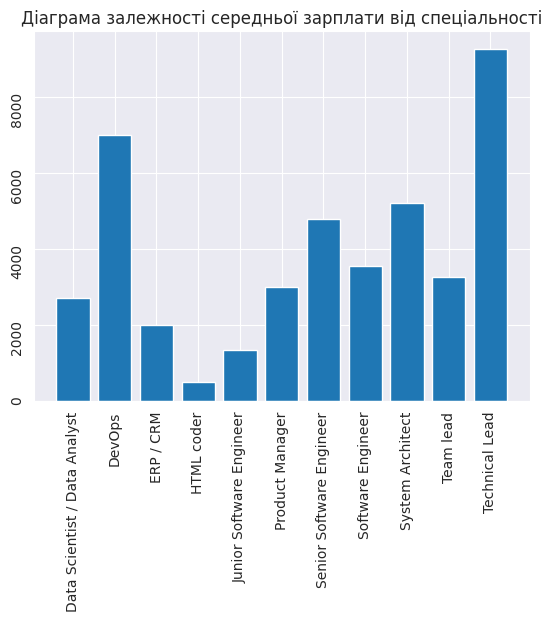

In [30]:
%matplotlib inline
df_2017_jun_final_new = pd.read_csv("2017_jun_final_new.csv")
sns.set_style('darkgrid')
plt.bar(df_2017_jun_final_new['Посада'], df_2017_jun_final_new['avg'])
plt.title('Діаграма залежності середньої зарплати від спеціальності')
plt.tick_params(labelrotation = 90)
plt.show()

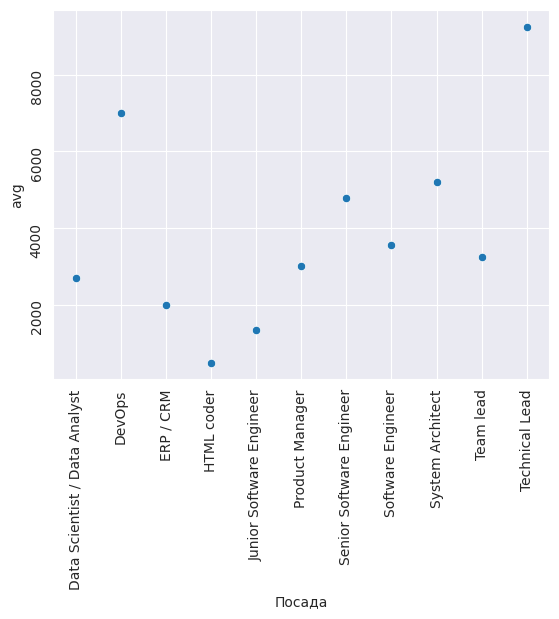

In [32]:
%matplotlib inline
sns.scatterplot(x='Посада', y='avg', data=df_2017_jun_final_new)
plt.tick_params(labelrotation = 90)
plt.show()